## There are more attack with a religious/politic target than the others

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

**Dataset**

In [4]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1")

/home/laura/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**Type of target of the attack**

In [152]:
data["targtype1_txt"].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

**Null values**

In [8]:
data["targtype1_txt"].isnull().sum()

0

**Number of target of type religious**

In [10]:
rel = ((data["targtype1_txt"] == 'Religious Figures/Institutions').sum())
rel

4440

**Number of target of type government**

In [11]:
pol = ((data["targtype1_txt"] == 'Government (Diplomatic)').sum())
pol

3573

**All the other targets (religious and government excluded)**

In [153]:
others = (((data["targtype1_txt"] != 'Religious Figures/Institutions') & (data["targtype1_txt"] != 'Government (Diplomatic)')).sum())
others

173678

**Pie chart to analyze the number of Religious and Government targets compared to the totality**

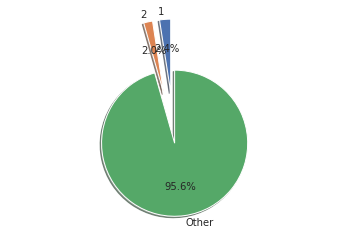

In [66]:
labels = '1', '2', 'Other' #1 Religious, 2 Government
sizes = [rel, pol, others]
explode = (0.7, 0.7, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 10})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [154]:
data_num = data[['targtype1_txt', 'eventid']]
data_num = data_num.groupby('targtype1_txt').count()
data_num['eventid']

targtype1_txt
Abortion Related                    263
Airports & Aircraft                1343
Business                          20669
Educational Institution            4322
Food or Water Supply                317
Government (Diplomatic)            3573
Government (General)              21283
Journalists & Media                2948
Maritime                            351
Military                          27984
NGO                                 970
Other                               137
Police                            24506
Private Citizens & Property       43511
Religious Figures/Institutions     4440
Telecommunication                  1009
Terrorists/Non-State Militia       3039
Tourists                            440
Transportation                     6799
Unknown                            5898
Utilities                          6023
Violent Political Party            1866
Name: eventid, dtype: int64

In [155]:
target_sorted = data.targtype1_txt.unique()
target_sorted.sort()
target_sorted

array(['Abortion Related', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Food or Water Supply',
       'Government (Diplomatic)', 'Government (General)',
       'Journalists & Media', 'Maritime', 'Military', 'NGO', 'Other',
       'Police', 'Private Citizens & Property',
       'Religious Figures/Institutions', 'Telecommunication',
       'Terrorists/Non-State Militia', 'Tourists', 'Transportation',
       'Unknown', 'Utilities', 'Violent Political Party'], dtype=object)

**Hystogram to analyze the quantity of Religious and Government targets compared to the quantity of the other types of targets**

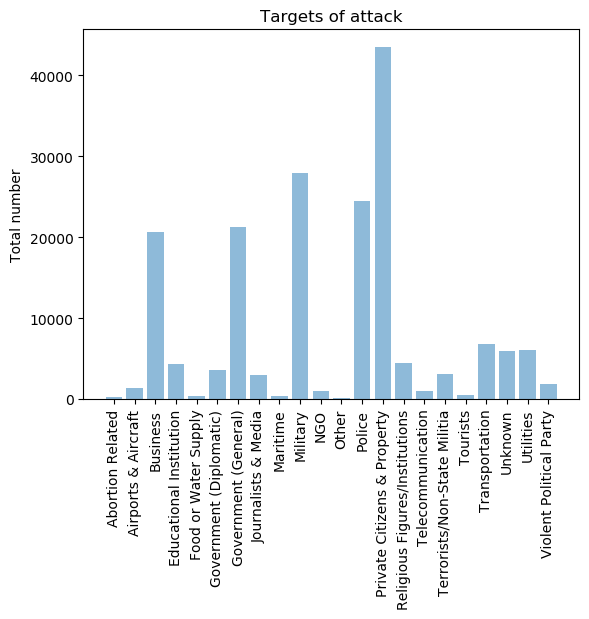

In [148]:
objects = target_sorted
y_pos = np.arange(len(objects))
performance = data_num['eventid']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total number')
plt.title('Targets of attack')
plt.xticks(rotation='vertical')

plt.show()